In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)


In [3]:
transactions = pd.read_excel("QVI_transaction_data.xlsx")
customers = pd.read_csv("QVI_purchase_behaviour.csv")


In [4]:
transactions.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [22]:
transactions.info()
transactions.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 264834 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264834 non-null  datetime64[ns]
 1   STORE_NBR       264834 non-null  int64         
 2   LYLTY_CARD_NBR  264834 non-null  int64         
 3   TXN_ID          264834 non-null  int64         
 4   PROD_NBR        264834 non-null  int64         
 5   PROD_NAME       264834 non-null  object        
 6   PROD_QTY        264834 non-null  int64         
 7   TOT_SALES       264834 non-null  float64       
 8   PACK_SIZE       264834 non-null  float64       
 9   BRAND           264834 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 22.2+ MB


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,264834,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,2018-12-30 00:52:10.292938240,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346,182.425512
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,2018-09-30 00:00:00,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,2018-12-30 00:00:00,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,2019-03-31 00:00:00,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,380.000000
std,NaN,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241,64.325148


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [7]:
transactions["DATE"] = pd.to_datetime(transactions["DATE"], unit='D', origin='1899-12-30')

In [8]:
transactions["PROD_QTY"].describe()

count    264836.000000
mean          1.907309
std           0.643654
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64

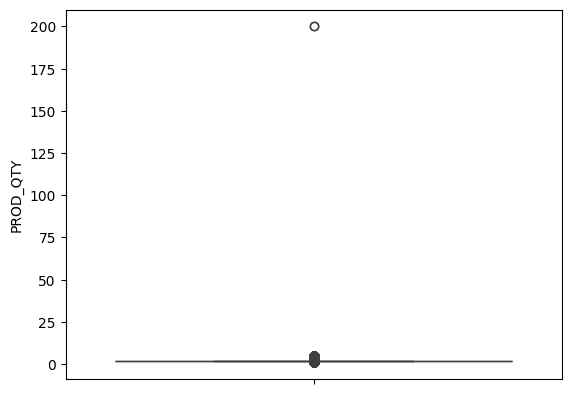

In [9]:
sns.boxplot(transactions["PROD_QTY"])
plt.show()


In [10]:
transactions = transactions[transactions["PROD_QTY"] < 20]


In [11]:
transactions["PACK_SIZE"] = transactions["PROD_NAME"].str.extract("(\d+)").astype(float)


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_24508\2677253781.py:1: SyntaxWarning: invalid escape sequence '\d'
  transactions["PACK_SIZE"] = transactions["PROD_NAME"].str.extract("(\d+)").astype(float)


In [12]:
transactions["BRAND"] = transactions["PROD_NAME"].str.split().str[0]


In [13]:
transactions["BRAND"] = transactions["BRAND"].replace({
    "Red": "Red Rock",
    "GrnWves": "Grain Waves",
    "Smith": "Smiths",
    "Infuzions": "Infuzions",
    "Dorito": "Doritos",
    "WW": "Woolworths",
    "Thins": "Thins"
})


In [14]:
data = transactions.merge(customers, on="LYLTY_CARD_NBR", how="inner")


In [15]:
sales_lifestage = data.groupby("LIFESTAGE")["TOT_SALES"].sum().sort_values(ascending=False)
sales_lifestage


LIFESTAGE
OLDER SINGLES/COUPLES     402426.75
RETIREES                  366470.90
OLDER FAMILIES            352467.20
YOUNG FAMILIES            316160.10
YOUNG SINGLES/COUPLES     260405.30
MIDAGE SINGLES/COUPLES    184751.30
NEW FAMILIES               50433.45
Name: TOT_SALES, dtype: float64

In [16]:
sales_premium = data.groupby("PREMIUM_CUSTOMER")["TOT_SALES"].sum()
sales_premium


PREMIUM_CUSTOMER
Budget        676211.55
Mainstream    750744.50
Premium       506158.95
Name: TOT_SALES, dtype: float64

In [17]:
avg_spend = data.groupby("LIFESTAGE")["TOT_SALES"].mean()
avg_spend


LIFESTAGE
MIDAGE SINGLES/COUPLES    7.357678
NEW FAMILIES              7.289124
OLDER FAMILIES            7.253307
OLDER SINGLES/COUPLES     7.386823
RETIREES                  7.364325
YOUNG FAMILIES            7.252709
YOUNG SINGLES/COUPLES     7.158515
Name: TOT_SALES, dtype: float64

In [18]:
pack_pref = data.groupby("LIFESTAGE")["PACK_SIZE"].mean()
pack_pref


LIFESTAGE
MIDAGE SINGLES/COUPLES    182.720868
NEW FAMILIES              181.371152
OLDER FAMILIES            182.152858
OLDER SINGLES/COUPLES     182.386204
RETIREES                  182.674658
YOUNG FAMILIES            181.906221
YOUNG SINGLES/COUPLES     183.126728
Name: PACK_SIZE, dtype: float64

In [19]:
brand_pref = (
    data.groupby(["LIFESTAGE", "BRAND"])["TOT_SALES"]
    .sum()
    .reset_index()
)
brand_pref.head()


,LIFESTAGE,BRAND,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Burger,660.1
1,MIDAGE SINGLES/COUPLES,CCs,1717.8
2,MIDAGE SINGLES/COUPLES,Cheetos,1499.7
3,MIDAGE SINGLES/COUPLES,Cheezels,4080.6
4,MIDAGE SINGLES/COUPLES,Cobs,6995.8


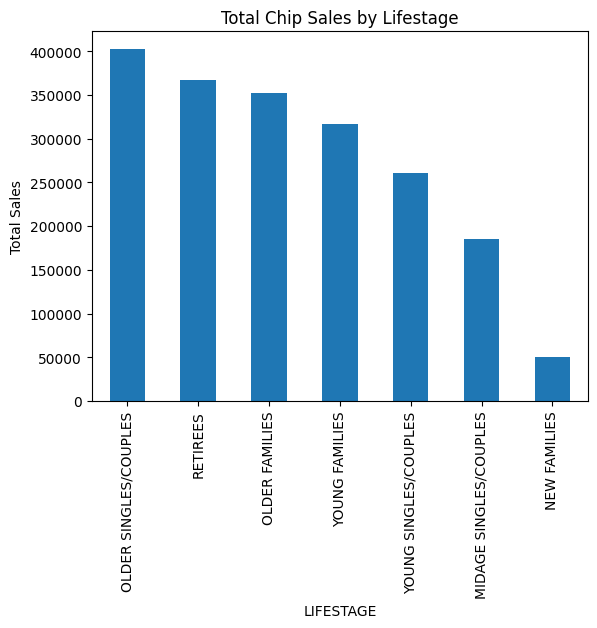

In [20]:
sales_lifestage.plot(kind="bar", title="Total Chip Sales by Lifestage")
plt.ylabel("Total Sales")
plt.show()


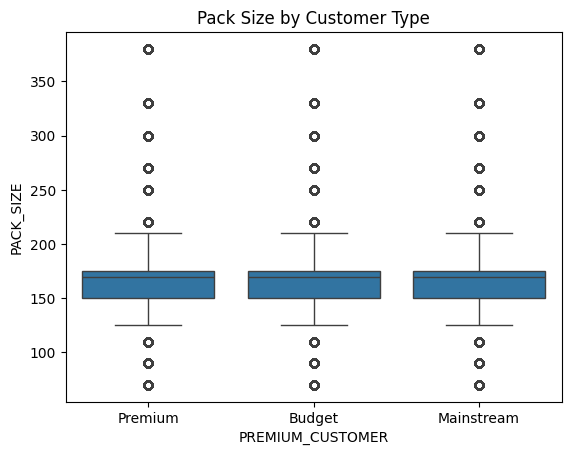

In [21]:
sns.boxplot(x="PREMIUM_CUSTOMER", y="PACK_SIZE", data=data)
plt.title("Pack Size by Customer Type")
plt.show()


Example recommendation (VERY IMPORTANT):

Focus promotions of large pack sizes on family segments

Introduce premium flavours and brands targeted at premium singles and couples

Allocate shelf space by segment dominance (family-focused stores vs urban stores)